## Visualizing Rotated MINST samples

In [4]:
#Common imports
import os
import random
import copy
import numpy as np

#Pillow
from PIL import Image  
import PIL  

#Matplotlib
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

In [2]:
data_obj= datasets.MNIST('../../data/rot_mnist',
                        train=True,
                        download=False,
                        transform=transforms.ToTensor()
                    )
train_loader = torch.utils.data.DataLoader(data_obj,
                                                   batch_size=60000,
                                                   shuffle=False)


for i, (x, y) in enumerate(train_loader):
    mnist_imgs = x
    mnist_labels = y

In [3]:
to_pil=  transforms.Compose([
                transforms.ToPILImage(),
            ])
angles=[0, 15, 30, 45, 60, 75, 90]

In [11]:
indice= random.randint(0, mnist_imgs.shape[0])
mnist_img= mnist_imgs[indice]
rotated_imgs=[]
for angle in angles:
    rotated_imgs.append( transforms.functional.rotate( to_pil(mnist_img), angle) )

In [12]:
counter=0
for img in rotated_imgs:
    img.save('../../results/rot_mnist/images/' + str(angles[counter]) + '.jpg')
    counter+=1

## T_SNE Plots

# Fashion MNIST

Train Domains: 0, 30
Domain Size: 2,000
K: 10

Training Data:

Size of domain 0: Domain Size 
Size of domain 30: Domain Size / K

Validation Data: Training Data / 4

Test Data:

Size of each of the domains 0, 30: Domain Size

Model: Pretrained ResNet-18

## ERM's performance with scaling factor k

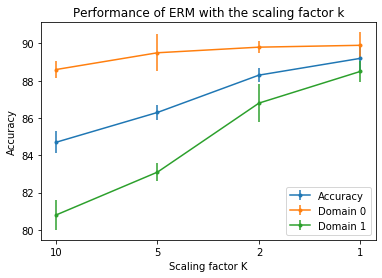

In [14]:
x= ['10', '5', '2', '1']
y= [84.7,  86.3, 88.3, 89.2]
yerr=[0.59, 0.42, 0.36, 0.60]
plt.errorbar(x, y, yerr, marker='.', label='Accuracy')

y= [88.6,  89.5, 89.8, 89.9]
yerr=[0.46, 1.0, 0.32, 0.70]
plt.errorbar(x, y, yerr, marker='.', label='Domain 0')

y= [80.8, 83.1, 86.8, 88.5]
yerr=[0.80, 0.47, 1.03, 0.57]
plt.errorbar(x, y, yerr, marker='.', label='Domain 1')

plt.title('Performance of ERM with the scaling factor k')
plt.ylabel('Accuracy')
plt.xlabel('Scaling factor K')
plt.legend()

## Scaling Factor 10 Results: Test Accuracy

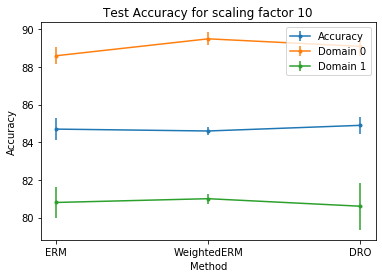

In [15]:
x= ['ERM', 'WeightedERM', 'DRO']
y= [84.7,  84.6, 84.9]
yerr=[0.59, 0.20, 0.45]
plt.errorbar(x, y, yerr, marker='.', label='Accuracy')

y= [88.6,  89.5, 89.1]
yerr=[0.46, 0.35, 0.52]
plt.errorbar(x, y, yerr, marker='.', label='Domain 0')

y= [80.8, 81.0, 80.6]
yerr=[0.80, 0.27, 1.26]
plt.errorbar(x, y, yerr, marker='.', label='Domain 1')

plt.title('Test Accuracy for scaling factor 10')
plt.ylabel('Accuracy')
plt.xlabel('Method')
plt.legend()

## Scaling Factor 10 Results: Val Accuracy

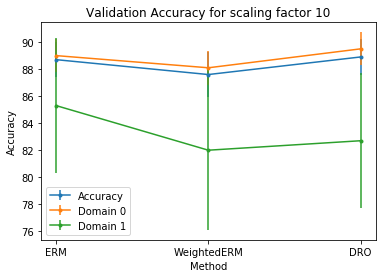

In [16]:
x= ['ERM', 'WeightedERM', 'DRO']
y= [88.7,  87.6, 88.9]
yerr=[1.30, 1.66, 1.32]
plt.errorbar(x, y, yerr, marker='.', label='Accuracy')

y= [89.0,  88.1, 89.5]
yerr=[1.23, 1.24, 1.23]
plt.errorbar(x, y, yerr, marker='.', label='Domain 0')

y= [85.3, 82.0, 82.7]
yerr=[4.99, 5.9, 4.99]
plt.errorbar(x, y, yerr, marker='.', label='Domain 1')

plt.title('Validation Accuracy for scaling factor 10')
plt.ylabel('Accuracy')
plt.xlabel('Method')
plt.legend()